In [47]:
%matplotlib notebook
import matplotlib as mpl
mpl.use('pdf')
# mpl.rcParams.update({'font.size': 26})

import os
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from itertools import product

/home/cloud-user/code/source_finding/venv/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [56]:
if True:
    datasets = ['p2p-gnutella08', 'arxiv-hep-th', 'enron-email']
    models = ['si']
else:
    datasets = ['enron-email']
    models = ['si', 'ic', 'sp']
methods = ["greedy"]  
qs = np.linspace(0.005, 0.1, 20)
qs_str = list(map(str, qs))

column_names = ['mmc', 'prec', 'rec', 'obj']

In [57]:
dirname_template = "outputs/paper_experiment/{dataset}/{model}/{method}/qs/{q}.pkl"

In [58]:
result = {}
for dataset, model in product(datasets, models):
    key = (dataset, model)
    result[key] = {}
    for method in methods:
        result[key][method] = []
        for q in qs_str:
            path = dirname_template.format(dataset=dataset, model=model, method=method, q=q)
            result[key][method].append(pd.read_pickle(path))

<IPython.core.display.Javascript object>


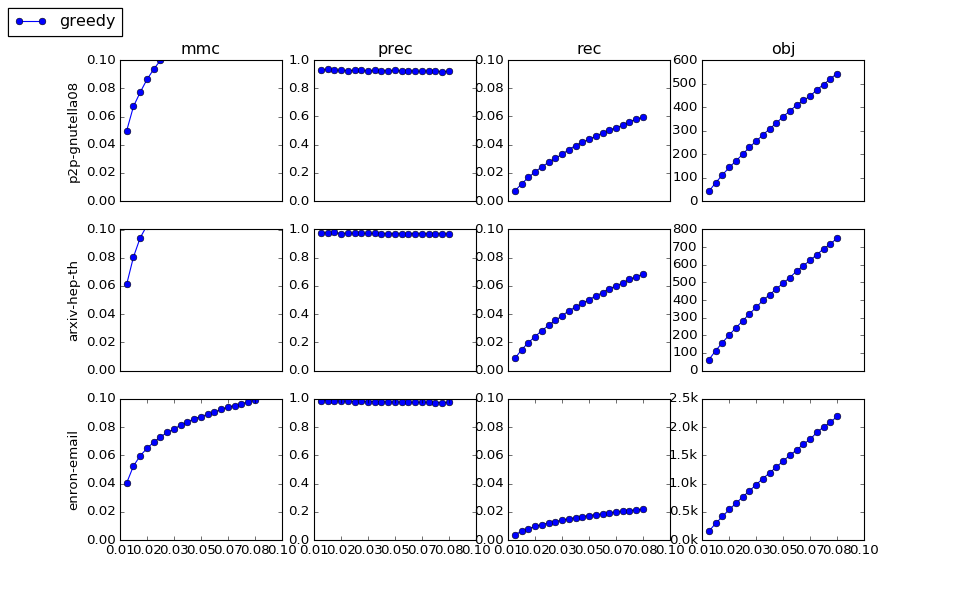

In [59]:
nrow = (len(datasets) if len(datasets) > 1 else len(models))
per_size, ncol = 3, len(column_names)
fig = plt.figure(figsize=(ncol * per_size,
                 (nrow-0.5) * per_size))
for i, (dataset, model) in enumerate(product(datasets, models)):
    key = (dataset, model)
    # one plot
    for j, column in enumerate(column_names):
        lines = []
        idx = i * ncol + j + 1
        ax = fig.add_subplot(nrow, ncol, idx)
        for method in methods:
            # one legend
            ys = [df[column]['mean'] for df in result[key][method]]
            l, = ax.plot(qs, ys, 'o-')
            lines.append(l)
        if i == 0:
            ax.set_title(column)
        if j == 0:
            if len(datasets) > 1:
                ax.set_ylabel(dataset)
            else:
                ax.set_ylabel(model.upper())
        if i == nrow - 1:
            ticklabels = list(map(lambda s: '{:.2f}'.format(s), qs[::3]))            
            ax.set_xticklabels(ticklabels)
        else:
            ax.set_xticks([])
        ylim = None
        if column == "prec":
            ylim = (0, 1)
        if column == "rec":
            ylim = (0, 0.1)
        if column == 'mmc':
            ylim = (0, 0.1001)
        if ylim is not None:
            ax.set_ylim(*ylim)
        if column in {'mmc', 'rec'}:
            yticks = ax.get_yticks()
            ax.set_yticklabels(list(map(lambda s: "{:.2f}".format(s), yticks)))
        if column == 'obj':
            yticks = ax.get_yticks()
            if yticks.max() > 1000:
                ax.set_yticklabels(list(map(lambda v: "{:.1f}k".format(v / 1000), yticks)))
    fig.legend(lines, methods, loc='upper left')

if len(datasets) > 1:
    fig.savefig('figs/paper_experiment/measure_by_datasets.pdf')
else:
    fig.savefig('figs/paper_experiment/measure_by_models.pdf')